# Part II - Some Prosper Borrowers' Demographics, including Credit Rating and their Effects on Investor Behaviour. 
## by Chimmuanya Mogbo

## Investigation Overview


> In this presentation, I intend to highlight some Prosper Loan demographics, especially those of their Borrower Partners. I also intend to briefly take a look at their possible effects on investor behaviour



## Dataset Overview

> This data set contains information regarding 113,937 loans with 81 variables on each loan from Prosper, an online peer-to-peer lending marketplace based in the United States. It contains vital information on their identity, credit rating, social status, the type and duration of loans they applied for, and the status of their loan. It also contains information on the status of previous loans, and how many people have invested in their loans.
Other important features include their employment status, occupation, salary, and Borrower state.
I am most interested in how these variables influenced investor behaviour and client ability to secure and to pay off their loans.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from random import randrange
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_df_subset = pd.read_csv('loan_df_subset.csv')
#make a copy
loan_df_subset_copy = loan_df_subset.copy()
loan_df_subset_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   113937 non-null  int64  
 1   ListingNumber                113937 non-null  int64  
 2   ListingCreationDate          113937 non-null  object 
 3   Term                         113937 non-null  int64  
 4   LoanStatus                   113937 non-null  object 
 5   BorrowerState                108422 non-null  object 
 6   Occupation                   110349 non-null  object 
 7   EmploymentStatus             113937 non-null  object 
 8   EmploymentStatusDuration     106312 non-null  float64
 9   IsBorrowerHomeowner          113937 non-null  bool   
 10  DebtToIncomeRatio            105383 non-null  float64
 11  IncomeRange                  113937 non-null  object 
 12  IncomeVerifiable             113937 non-null  bool   
 13 

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Current and Completed Loans make up 83.1% of all Prosper loans.
#### But a whopping 10.4% of loans were charged off as losses!

1. The majority of Prosper Loans -56,576 loans are current loans. This represents 49.7% of all their loans.
2. A close second subcategory of Prosper loans have been completely repaid (38,074), which represents 33.4% of all their loans . 
> Together with the current loans, they both make up 83.1% of all Prosper loans. 
3. A distant third subcategory of loans have been charged off (written off as losses) - a whopping 10.5%. This is apart from the 4.4% of loans that have been defaulted on. 

In [3]:
#lets write some functions

#write a function to make countplot

def make_countplot(x, dataset=loan_df_subset_copy):
    categories = dataset[x].value_counts().index
    values = dataset[x].value_counts().values
    categoryname = '{val_x}'.format(val_x=x)
    newdict = {categoryname:categories,
              'Counts': values}   
    columns = [categoryname, 'Counts']  
    plot_order = categories
    count_dataframe = pd.DataFrame(newdict, columns=columns)
    plt.xticks(rotation=65)
    color_index = randrange(10)
    default_color = sb.color_palette()[color_index]
    ax = sb.barplot(data=count_dataframe, x=columns[0], y=columns[1], color = default_color, order=plot_order);
    plt.title("Subcategories of {categoryname} by Counts".format(categoryname=columns[0]))
    i = 0
    for p in ax.patches:
        count = '{f}'.format(f=count_dataframe[columns[1]][i])
        x = p.get_x() + p.get_width() - 0.25
        y= p.get_height() + 1.25
        ax.annotate(count, (x, y), ha='center')
        i = i + 1


#write a function to create a percentage dataset
def makePercentTable(x, dataset=loan_df_subset_copy):
    categories = dataset[x].value_counts().index
    values = dataset[x].value_counts().values
    total = dataset[x].count()
    index = 0
    indices= []
    percentages = []
    categoryname = '{val_x}'.format(val_x=x)
    for category in categories:
        categorypercent  = round((values[index]/total) * 100, 1)
        percentages.append(categorypercent)
        indices.append(index)
        index = index + 1
    newObjdict = {categoryname:categories,
              'Percentage(%)': percentages}   
    columns = [categoryname, 'Percentage(%)']    
    mydataframe = pd.DataFrame(newObjdict, columns=columns, index=indices)
    return mydataframe
        
##write a function to create a percentage barplot    
def percentplot(dataset):
    columns = dataset.columns.tolist()
    dataset.sort_values(by=[columns[1]], ascending=False, inplace=True)
    plot_order = dataset[columns[0]].tolist()
    #plt.figure(figsize=(8, 4))
    plt.ylim(0,100)
    plt.xticks(rotation=45)
    color_index = randrange(10)
    total = float(len(dataset))
    default_color = sb.color_palette()[color_index]
    ax = sb.barplot(data=dataset, x=columns[0], y=columns[1], color = default_color, order=plot_order);
    plt.title("Categories of {categoryname} by Percentage".format(categoryname=columns[0]))
    i = 0
    for p in ax.patches:
        percentage = '{:.1f}%'.format(dataset[columns[1]][i])
        x = p.get_x() + p.get_width() - 0.25
        y= p.get_height() + 1
        ax.annotate(percentage, (x, y), ha='center')
        i = i + 1


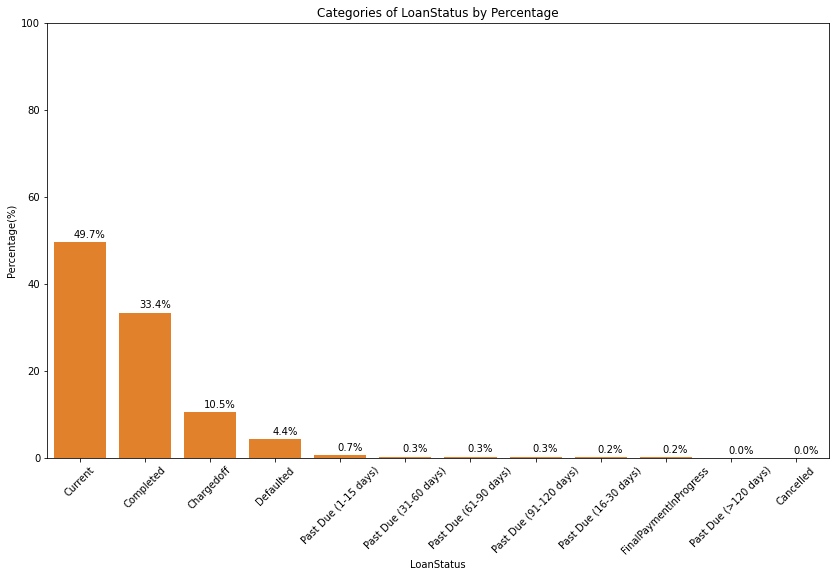

In [4]:
#lets get a clearer picture through a percentage table and plot
#create a percent dataset for LoanStatus Categories
plt.figure(figsize=(14,8))
loanstatus_percent= makePercentTable(x='LoanStatus')
#print(loanstatus_percent)
percentplot(loanstatus_percent)

## Over 80% of all Prosper Loans debtors are earning or earned more than USD25,000 per year. 
#### It would seem that Prosper Loan investors were more likely to lend to creditors that are or were in some form of employment. 

1. Over 80% of all Prosper Loans debtors are earning or earned more than \$25,000 per year. 
- In the same vein, over 80\% of this same population were or are employed in some way.
- A vast majority of indebted clients (59.1\%) were or are employed. Another 23\% have or had fulltime jobs.
> It would seem that Prosper Loan investors were more likely to lend to creditors that are or were in some form of employment. Clearly, investors preferred capital security to risk, as is almost always the case everywhere. 

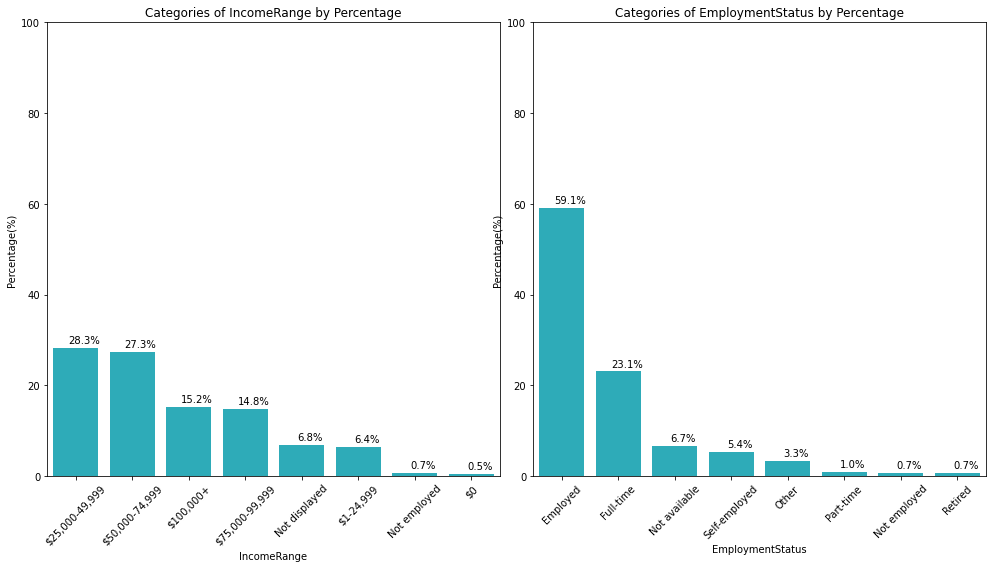

In [5]:
#lets get a clearer picture through a percentage bar plot

plt.figure(figsize=(14,8))

#percent barplot for IncomeRange
plt.subplot(1, 2, 1)
plt.tight_layout()
percentplot(makePercentTable(x='IncomeRange'))

#percent barplot for EmploymentStatus
plt.subplot(1,2,2)
plt.tight_layout()
percentplot(makePercentTable(x='EmploymentStatus'))

## Prosper Loan Borrowers generally have or had a high credit rating.
#### And Home Owners Benefitted more!
1. Prosper Loan Borrowers generally have or had a high credit rating, that is those with 5 and above accounted for more than half of all loans (58.1%).
2. Those with a median credit rating (4/7) had 21.1% of all recorded loans, which is the highest of any individual credit rating.
3. Home ownership also seems to play some role in influencing investor selection of which borrowers get loans, although Homeowners were slightly more than non homeowners. 

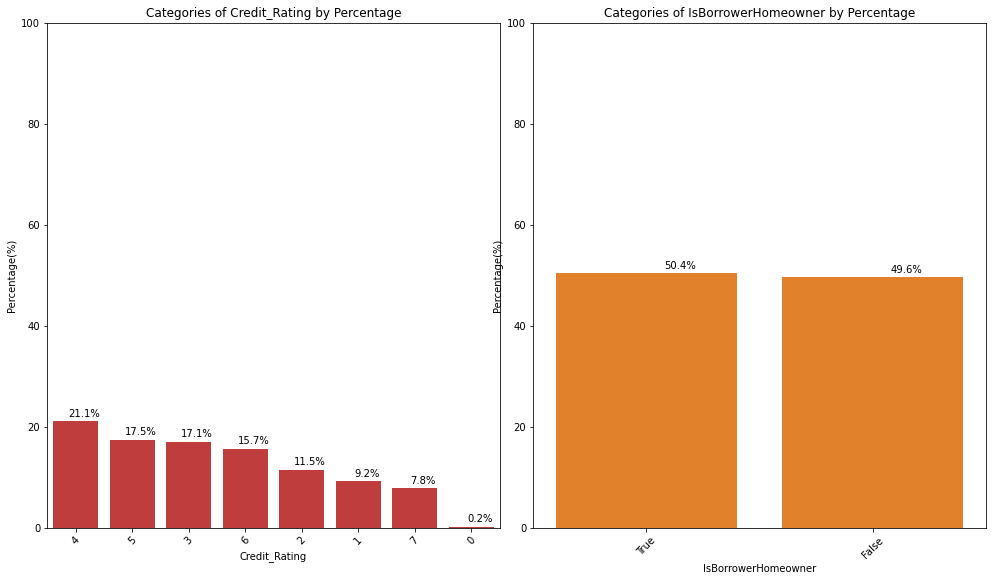

In [6]:
#lets use a percentage bar plot

plt.figure(figsize=(14,8))

#percent barplot for Credit ratings
plt.subplot(1, 2, 1)
plt.tight_layout()
percentplot(makePercentTable(x='Credit_Rating'))

#percent barplot for Homeowner status
plt.subplot(1,2,2)
plt.tight_layout()
percentplot(makePercentTable(x='IsBorrowerHomeowner'))

In [7]:
# first create some functions
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k',
              'tab:blue','tab:orange','tab:green','tab:red',
              'tab:purple','tab:brown','tab:pink','tab:gray',
              'tab:olive','tab:cyan']
def linear_histogram(x,xlabel,binsize,dataset=loan_df_subset_copy):
    binsize = binsize
    bins = np.arange(0, dataset[x].max() + binsize, binsize)
    
    colors1 = sb.color_palette("rocket")
    color1= colors1[randrange(len(colors1))]
    color = colors[randrange(len(colors))]
    plt.ylabel('Number of Loans')
    plt.xlabel(xlabel)
    plt.title("Distribution of {categoryname} by Count".format(categoryname=x))
    plt.hist(data=dataset, x=x, color=color1, bins=bins)

def log10_histogram(x,xlabel,binsize,dataset=loan_df_subset_copy):
    
    binsize = binsize
    bins = 10 ** np.arange(np.log10(dataset[x].min()+ 1), np.log10(dataset[x].max() + binsize), np.log10(binsize))
    
    colors1 = sb.color_palette("rocket")
    color1= colors1[randrange(len(colors1))]
    color = colors[randrange(len(colors))]
    plt.ylabel('Number of Loans')
    plt.xlabel(xlabel)
    plt.title("Distribution of {categoryname} by Count".format(categoryname=x))
    plt.hist(data=dataset, x=x, color=color1, bins=bins)
    plt.xscale('log')


## Prosper Loans Interest Rates Tend to be Higher than Lower.
#### And what is it with 32% per annum!?

1. Both the Borrower Interest Rate and Annual Percentage Rate are skewed to the right.
* Majority of the interest rates fell between 10% (0.1) per annum and just above 30% per annum
> Interestingly, there is a huge spike in the number of loans charged at an interest rate of just about 32% (about 5000 loans). This spike also corresponded with a spike in the number of loans charged at an Annual Percentage Rate of about 35% per annum (about 6000 loans).


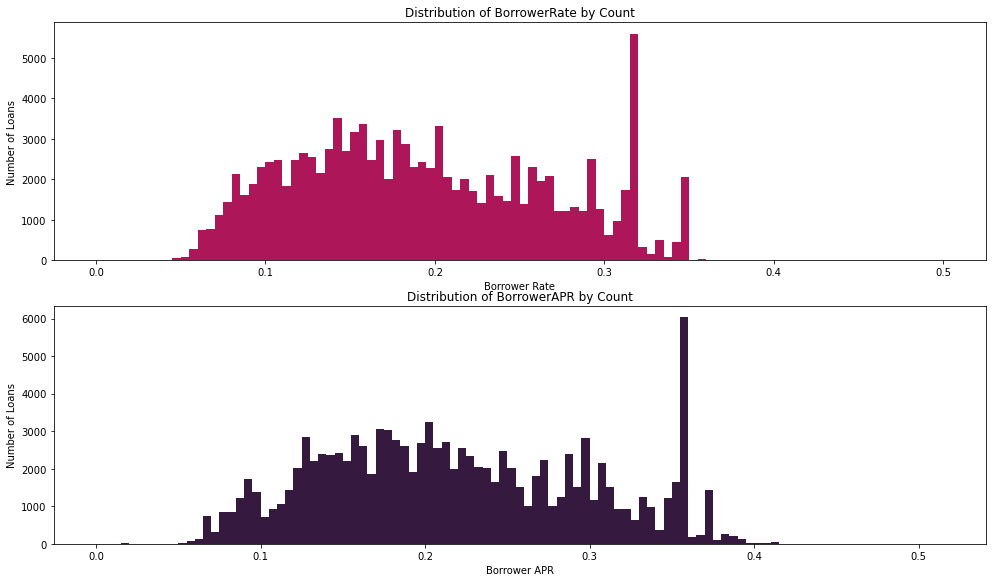

In [8]:
plt.figure(figsize=(14,8))

#percent barplot for Credit ratings
plt.subplot(2, 1, 1)
plt.tight_layout()
linear_histogram(x='BorrowerRate', xlabel='Borrower Rate', binsize=0.005)

#percent barplot for Homeowner status
plt.subplot(2,1,2)
plt.tight_layout()
linear_histogram(x='BorrowerAPR', xlabel='Borrower APR', binsize=0.005)

# plt.subplot(2,1,1)
# linear_histogram(x='StatedMonthlyIncome', xlabel='Stated Monthly Income ($)')


## ... And they are Quite Profitable!

- Prosper loans are quite profitable, with most of them having a profitabilty of between 10% and 25%.
- A large number of loans (about 5000+) have a yield of  about 31% in particular.


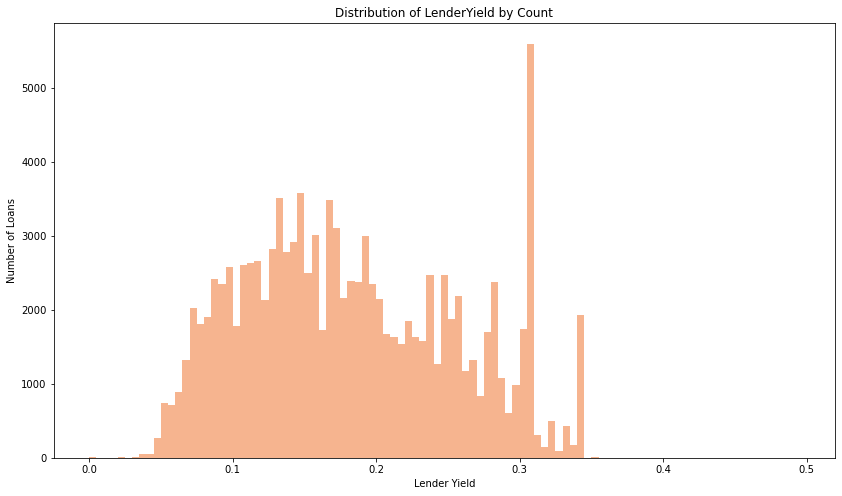

In [9]:
plt.figure(figsize=(14,8))
linear_histogram(x='LenderYield', xlabel='Lender Yield', binsize=0.005)

In [10]:
#lets create some functions again

def meanCount_table(x, var_2,dataset=loan_df_subset_copy):
    # x -categorical variable to group by
    # var2 - numeric variable for mean calculation
    categories = dataset.groupby(x).mean().index.tolist()
    counts = dataset[x].value_counts().values
    avg_var = dataset.groupby(x).mean()[var_2].tolist()
    categoryname = '{val_x}'.format(val_x=x)
    avg_var2 = 'Mean_{v_mean}'.format(v_mean=var_2, cat=categoryname)
    newdict = {
               categoryname:categories,
              'Counts': counts,
               avg_var2: avg_var
              }   
    columns = [categoryname, 'Counts', avg_var2]  
    count_dataframe = pd.DataFrame(newdict, columns=columns)
    return count_dataframe

def my_barplot(dataset, x, y, title='', colorindex=0):
    colors = sb.color_palette('Paired')
    color = colors[colorindex]
    plt.title(title)
    sb.barplot(data=dataset, y=y, x=x, color=color)
        

## The Peace Garden State is the Best, North Dakota!
#### What is it with Maine, ... and DC?
> So while Borrowers from DC are the highest paid and have the lowest debt to income ratio, they were one of the least profitable states/locations for investors.<br>
  A close second in this paradox is Maine: Although they are highly paid compared to other states, they have one of the highest debt to income ratios in the country. Also, they are one of the least profitable to investors, ranking 50 out of 51 states (including DC).<br>
 In contrast borrowers from North Dakota, which ranked 51 out of 51 states in monthly income, were among the top 3 states by loan profitability in the country.<br>

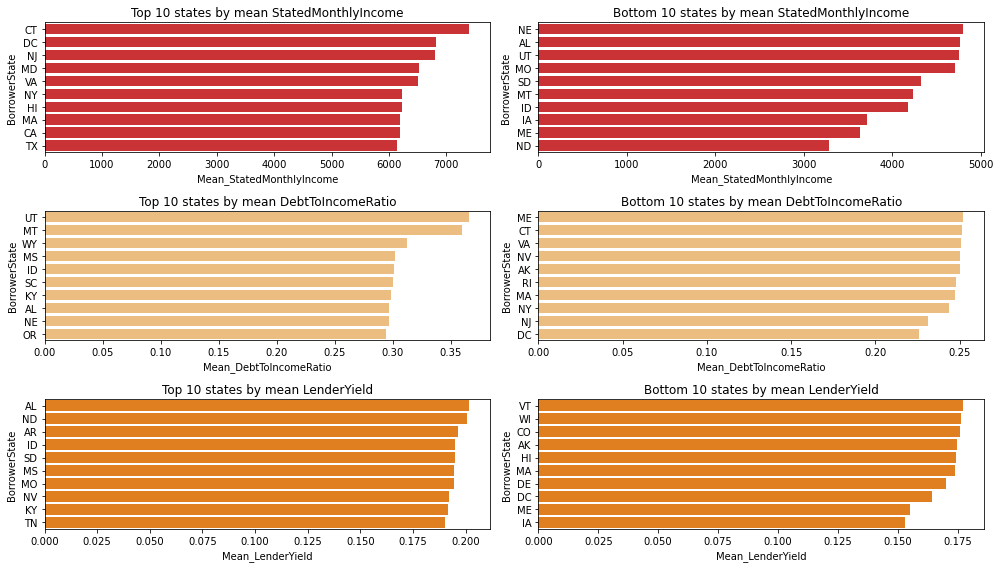

In [11]:
vals = ['StatedMonthlyIncome', 'DebtToIncomeRatio', 'LenderYield']
index, colorindex = [1, 5]
plt.figure(figsize=(14, 8))
#print(states_count.tail(10))
for val in vals:
   
    states_count = meanCount_table(x='BorrowerState', var_2=val)
    states_count.sort_values(by='Mean_{val}'.format(val=val), ascending=False, inplace=True)
    top_d = states_count[:10]
    bottom_d = states_count[41:]
    plt.tight_layout()
    plt.subplot(3,2, index)
    my_barplot(colorindex=colorindex,dataset=top_d, y='BorrowerState', x='Mean_{val}'.format(val=val), title='Top 10 states by mean {val}'.format(val=val))
    index = index + 1
    plt.subplot(3,2,index)
    plt.tight_layout()
    my_barplot(colorindex=colorindex,dataset=bottom_d, y='BorrowerState', x='Mean_{val}'.format(val=val), title='Bottom 10 states by mean {val}'.format(val=val))
    index = index + 1
    colorindex +=1
    


In [12]:

loan_df_subset_mod = loan_df_subset_copy.copy()
loan_df_subset_mod['Credit_Rating'] = loan_df_subset_mod['Credit_Rating'].astype('int')

## Fix your Credit Rating Borrowers
#### ... And maybe Enjoy Lower Rates and More Investors!
- Except for zero credit rating, the borrower rates, borrower APR and lender yields fell progressively with increasing credit ratings while investor numbers increased progressively with higher credit ratings.
- Could this be explained by highly rated borrowers negotiating lower rates for themselves because investors prefer security to risk?
- Meanwhile, Debt to Income Ratio, Employment Status duration and Stated Monthly income remained at relatively stable levels accross all the credit grades.

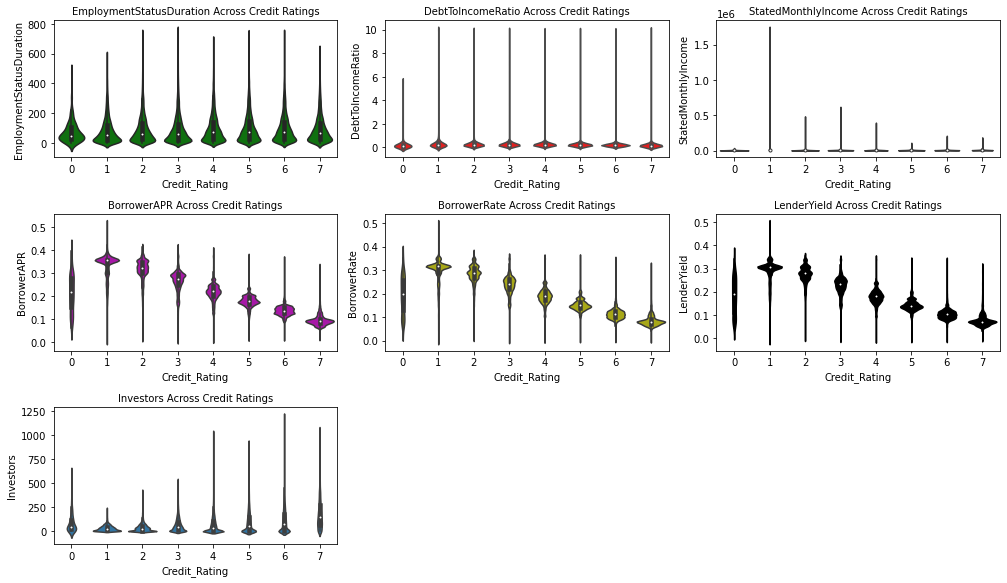

In [13]:
#violin plot exploring the following factors accross different credit rates
plt.figure(figsize=(14,8))
rating_factors = ['EmploymentStatusDuration', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'BorrowerAPR',
       'BorrowerRate','LenderYield','Investors']
index = 1
for factor in rating_factors:
    plt.subplot(3,3,index)
    plt.tight_layout()
    plt.title(label='{val} Across Credit Ratings'.format(val=factor), fontdict={'fontsize':10})
    sb.violinplot(data=loan_df_subset_mod, x='Credit_Rating', y=factor, color=colors[index])
    index +=1

## Tried and Failed to get Loans?
#### Investors love 'Medium' ... If you aren't BROKE or Hiding!

- Some Interesting Findings:
1. Investor Numbers were significantly less among borrowers who did not disclose their range of earnings, compared to even those that earned \$0.

2. Among other groups (apart from the unemployed and those earning $0), investors preferred medium term loans hte most, followed by longer term loans. They funded shorter term loans the least.

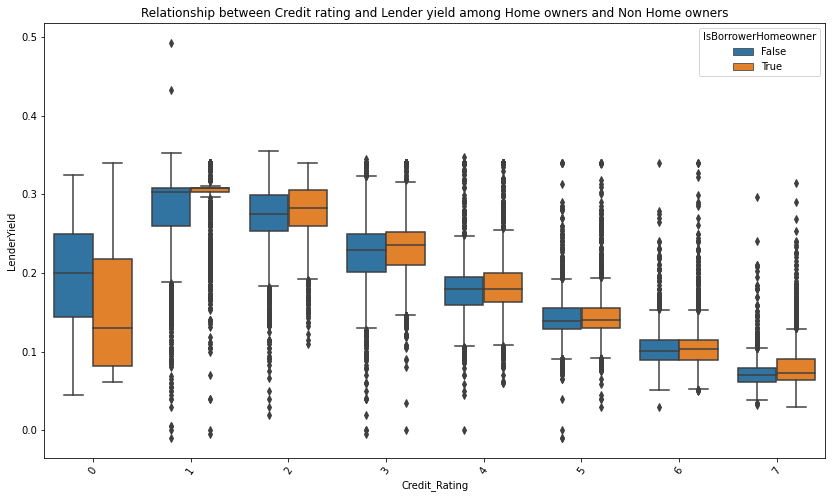

In [14]:
#boxplot to assess this visualize this relationship with a samplesize of 50,000
plt.figure(figsize=(14, 8))
plt.title('Relationship between Credit rating and Lender yield among Home owners and Non Home owners')
sb.boxplot(data=loan_df_subset_mod.sample(50000), x='Credit_Rating', y='LenderYield', hue='IsBorrowerHomeowner')
plt.xticks(rotation=55)
plt.show()

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part-II_Presentation.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part-II_Presentation.ipynb to slides
[NbConvertApp] Writing 950363 bytes to Part-II_Presentation.slides.html
[NbConvertApp] Serving local reveal.js
Serving your slides at http://127.0.0.1:8000/Part-II_Presentation.slides.html
Use Control-C to stop this server


> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 